In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Logistics_Cleaned_Dataset.csv')
df




,Shipment_ID,Order_ID,Customer_Name,Source_City,Destination_City,Shipment_Date,Delivery_Date,Transport_Mode,Weight_Kg,Distance_Km,...,Cost,Profit,Selling_Price,Delivery_Status,Damage_Flag,Delivery_Time_Days,Return_Reason,Driver_Rating,Vehicle_Type,Fuel_Consumption_Litres
0,10001,12270,Aisha,Kolkata,Hyderabad,29-11-2022,10-12-2022,Road,25,100,...,800,400,1200,In Transit,1,3,Wrong Item,3,Mini Van,30
1,10002,5860,Unknown,Kolkata,Unknown,02-02-2021,01-02-2022,Road,15,200,...,1500,-1200,300,Cancelled,1,2,Late,3,Unknown,30
2,10003,10390,Unknown,Kolkata,Bangalore,01-05-2023,24-12-2022,Unknown,15,50,...,1500,-300,1200,In Transit,1,8,Late,3,Bike,25
3,10004,10191,Unknown,Hyderabad,Delhi,01-09-2022,20-09-2022,Sea,30,200,...,800,400,1200,Delivered,1,1,Late,3,Bike,10
4,10005,10734,Unknown,Unknown,Bangalore,29-10-2022,11-02-2022,Unknown,5,400,...,800,800,1600,Unknown,1,6,Unknown,4,Unknown,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,9427,Unknown,Unknown,Coimbatore,06-07-2021,03-01-2021,Road,20,400,...,800,400,1200,In Transit,1,2,Damaged,1,Unknown,20
4996,14997,11135,Sita,Kolkata,Unknown,06-04-2023,04-05-2023,Road,20,100,...,800,-500,300,Cancelled,1,1,Wrong Item,5,Bike,10
4997,14998,10573,Unknown,Bangalore,Unknown,09-01-2023,31-07-2022,Rail,20,20,...,800,400,1200,In Transit,1,5,Damaged,4,Truck,15
4998,14999,9131,John,Kolkata,Coimbatore,08-07-2022,10-08-2021,Sea,5,400,...,1500,-300,1200,Returned,1,5,Unknown,2,Mini Van,20


In [ ]:
1.	Line chart → Daily shipment count.

/tmp/ipython-input-1316281639.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')


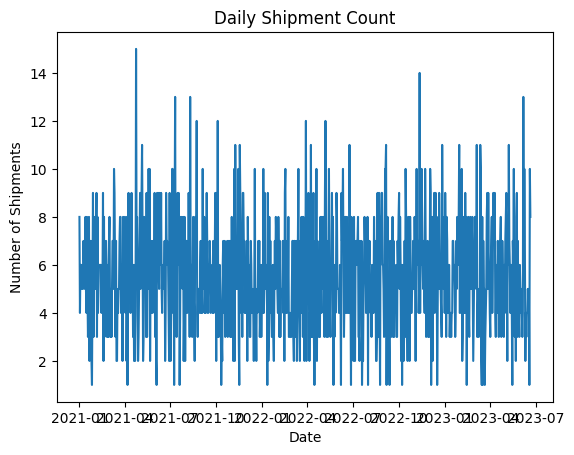

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')
daily_shipments = df.groupby('Shipment_Date').size()
plt.figure()
plt.plot(daily_shipments.index, daily_shipments.values)
plt.title('Daily Shipment Count')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.show()


In [ ]:
2.	Bar chart → Vendor vs Shipments.

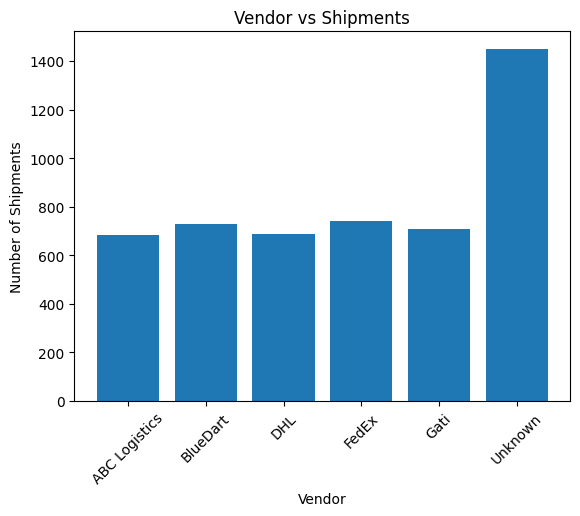

In [ ]:
vendor_shipments = df.groupby('Vendor').size()
plt.figure()
plt.bar(vendor_shipments.index, vendor_shipments.values)
plt.title('Vendor vs Shipments')
plt.xlabel('Vendor')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
3.	Histogram → Weight distribution.

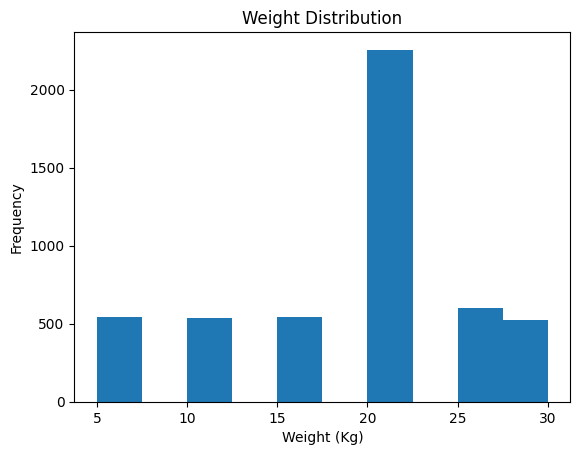

In [ ]:
plt.figure()
plt.hist(df['Weight_Kg'].dropna())
plt.title('Weight Distribution')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
4.	Pie chart → Delivery Status %.

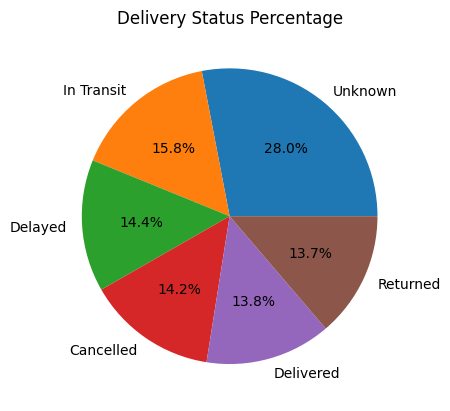

In [ ]:
status_count = df['Delivery_Status'].value_counts()
plt.figure()
plt.pie(
    status_count,
    labels=status_count.index,
    autopct='%1.1f%%'
)
plt.title('Delivery Status Percentage')
plt.show()


In [ ]:
5.	Scatter → Distance vs Delivery Time.

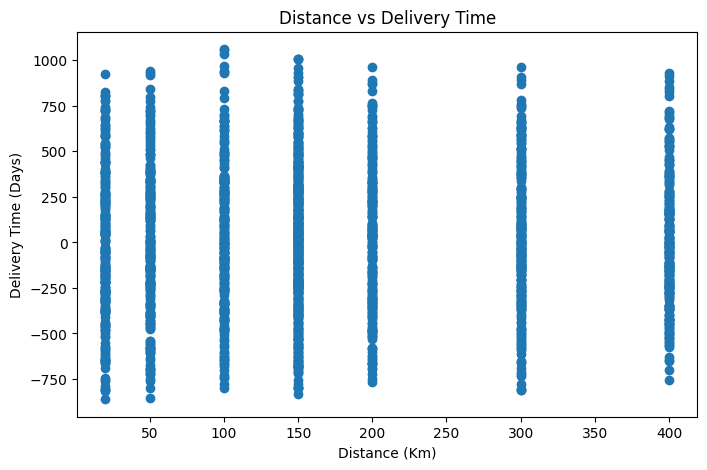

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')
df['Delivery_Time_Days'] = (df['Delivery_Date'] - df['Shipment_Date']).dt.days
df['Distance_Km'] = pd.to_numeric(df['Distance_Km'], errors='coerce')
clean_df = df[['Distance_Km', 'Delivery_Time_Days']].dropna()
plt.figure(figsize=(8,5))
plt.scatter(clean_df['Distance_Km'], clean_df['Delivery_Time_Days'])
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (Km)')
plt.ylabel('Delivery Time (Days)')
plt.show()
